### 1. Imports

In [1]:
# Import libraries
import gym
import numpy as np
from stable_baselines3 import PPO, A2C, DQN
from matplotlib import pyplot as plt

In [2]:
# Import classes
from rl_environment import Environment

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



c:\users\patri\documents\github\reinforcementlearninginventorymanagement\venv_37\lib\site-packages\stable_baselines\__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


### Environment creation

In [3]:
# Parameters
number_of_regional_warehouses = 1
max_inventory_amount_regional_warehouses = 25
max_inventory_amount_central_warehouse = 100
customer_demand_per_step = 1
simulation_length = 40
lead_time = 2

In [4]:
env = Environment(number_of_regional_wh = number_of_regional_warehouses, 
                  rw_inventory_limit = max_inventory_amount_regional_warehouses, 
                  cw_inventory_limit = max_inventory_amount_central_warehouse,
                  demand = customer_demand_per_step,
                  sim_length = simulation_length,
                  lead_time = lead_time)

Simulation created with the following parameters:
------------------------------------------------------------
central_warehouse ; Inventory: 33
regional_warehouse_1 ; ID: 1 ; Inventory: 8 ; Demand: 1 ; Lost sales: 0
------------------------------------------------------------


### RL model training

###### Model 1: PPO
Proximal Policy Optimization
https://openai.com/blog/openai-baselines-ppo/

In [5]:
ppo_model = DQN("MlpPolicy", env)
ppo_model.learn(total_timesteps=1000000)

###### Learning Curve

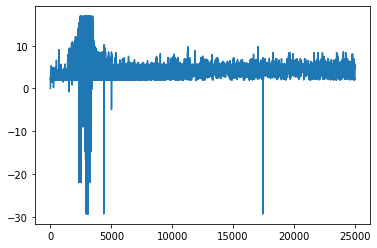

[0, 2.234882540732925, 2.5768056174692333, 2.4803134118913497, 2.0133538935302298, 2.0293188058109317, 2.1091401692936227, 1.9234860867583987, 2.0293387289039466, 2.3911158844968914, 2.382208913190876, 2.2134873876740215, 1.9913667733232956, 2.3749414726178095, 1.957908461769009, 2.121889116663986, 2.090082779539302, 1.9033543344527337, 2.203402486783494, 2.070925403099317, 2.342770661570971, 2.5816777501674526, 1.9560900934813987, 1.9214856475840467, 3.330713187778405, 2.3039820400804385, 2.6229530231064766, 1.9822230525938975, 2.2854713381247915, 1.9613366585105723, 2.8049866613472076, 1.945771361869761, 2.598845435423373, 2.570272647926101, 2.4161603713138247, 2.712405998527279, 2.0445813661593046, 2.1153346773998956, 3.495819791700799, 2.665626914813548, 2.2934966154453975, 2.182964152739022, 2.507304724261246, 2.0067720981326453, 2.6188685547189388, 2.269409287411711, 2.729627679046846, 2.6707094464740178, 3.2964707766471126, 2.640307729168276, 3.7050806198632285, 2.5222752664619,

In [6]:
plt.plot(env.total_reward)
plt.show()
print(env.total_reward)

### Run simulation

In [7]:
# Reset environment for simulation
state = env.reset()
done = False

# Graph data
inventory_levels = []
actions = []

# Run simulation with model
while not done:
    action, _states = ppo_model.predict(state)
    state, reward, done, info = env.step(action)
    
    inventory_levels.append(info["Inventory:"])
    actions.append(info["Action:"])
    
    for i in info:
        print(i, info[i], end=" | ")
    print()
    
print("\n", env.evaluation_parameters())

Steps left: 39 | Inventory: 7 | Action: 1 | Reward: 0.12 | 
Steps left: 38 | Inventory: 6 | Action: 1 | Reward: 0.14 | 
Steps left: 37 | Inventory: 10 | Action: 0 | Reward: 0.09 | 
Steps left: 36 | Inventory: 14 | Action: 0 | Reward: 0.07 | 
Steps left: 35 | Inventory: 13 | Action: 1 | Reward: 0.07 | 
Steps left: 34 | Inventory: 12 | Action: 0 | Reward: 0.08 | 
Steps left: 33 | Inventory: 16 | Action: 0 | Reward: 0.06 | 
Steps left: 32 | Inventory: 15 | Action: 1 | Reward: 0.06 | 
Steps left: 31 | Inventory: 14 | Action: 0 | Reward: 0.07 | 
Steps left: 30 | Inventory: 18 | Action: 1 | Reward: 0.05 | 
Steps left: 29 | Inventory: 17 | Action: 0 | Reward: 0.06 | 
Steps left: 28 | Inventory: 21 | Action: 0 | Reward: 0.05 | 
Steps left: 27 | Inventory: 20 | Action: 0 | Reward: 0.05 | 
Steps left: 26 | Inventory: 19 | Action: 0 | Reward: 0.05 | 
Steps left: 25 | Inventory: 18 | Action: 1 | Reward: 0.05 | 
Steps left: 24 | Inventory: 17 | Action: 0 | Reward: 0.06 | 
Steps left: 23 | Inventory

###### Inventory level graph

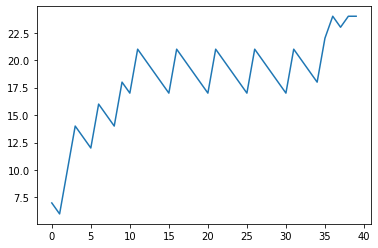

[7, 6, 10, 14, 13, 12, 16, 15, 14, 18, 17, 21, 20, 19, 18, 17, 21, 20, 19, 18, 17, 21, 20, 19, 18, 17, 21, 20, 19, 18, 17, 21, 20, 19, 18, 22, 24, 23, 24, 24]
[1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, array(1), 1, 0, 1, 1, 1, 1]


In [8]:
plt.plot(inventory_levels)
plt.show()
print(inventory_levels)
print(actions)